# Taller 2

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en las mismas **parejas** con las que realizó el Taller 1. No se aceptaran talleres de individuales. En caso de no tener un equipo asignado, informar al equipo docente.

5. El cuaderno debe poderse correr sin errores al momento de evaluar.

## Criterios de evaluación.
Estos pueden ser consultados con más detalle en la rúbrica presente en Bloque Neón. A grandes rasgos, en cada uno de los incisos se evaluará su solución y se espera que sea igual a la estipulada en el enunciado. Adicionalmente, su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|    1.1    |         1.0        |
|    1.2    |         1.5        |
|     2     |         2.5        |

Cada uno de los subnumerales del punto 2 vale lo mismo.

Este Taller evalúa los tópicos de la semana 4 a la 8 y tiene el valor de un 20% en su calificación final.

## Punto 1
Su trabajo es resolver el siguiente rompecabezas.

<center>
<img src="https://cdn.kastatic.org/ka-perseus-images/5b5fb2670c9a185b2666637461e40c805fcc9ea5.png">
</center>

Usted tiene tres postes y un número de discos $N$ de diferentes tamaños que pueden deslizarse en cualquier poste. El rompecabezas comienza con los discos apilados de manera cónica en un poste, con el disco más grande en la parte inferior y el más pequeño en la parte superior. 

El objetivo del juego es mover toda la pila a otro poste, siguiendo estas simples reglas:

1. Solo se puede mover un disco a la vez.
2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo en la parte superior de otra pila.
3. No se puede colocar un disco más grande encima de un disco más pequeño.

En internet puede encontrar el juego de forma interactiva [aquí](https://www.mathplayground.com/logic_tower_of_hanoi.html)

> Para la solución de este ejercicio, vamos a hacer uso de las funciones del archivo `utils.py` de esta misma carpeta. A continuación se le mostrará como funciona el código que hará su trabajo más sencillo.

In [1]:
# No es necesario modificar este código

# Vamos a importar unas funciones auxiliares que se encuentran en utils.py y van a ayudar a solucionar el taller 
from utils import movimiento, dibujar_torres

# El disco 3 es el más grande y la base de la torre. El disco dos es el mediano y el 1 está en el tope de la torre.
N = 3

posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

posiciones_iniciales

{'A': [3, 2, 1], 'B': [], 'C': []}

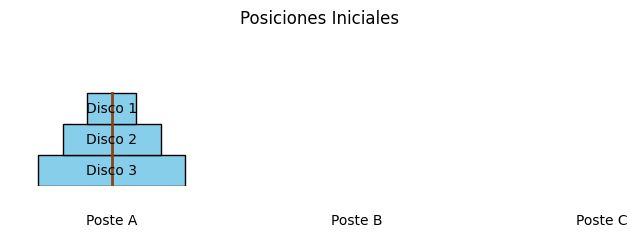

In [2]:
# Dibujar las posiciones iniciales
dibujar_torres(posiciones_iniciales, titulo = 'Posiciones Iniciales')

In [3]:
# Utilizamos la función movimiento para mover la ficha 1 del poste A hacia C
posiciones_finales = movimiento(posiciones_iniciales, ('A', 'C', 1))
posiciones_finales

{'A': [3, 2], 'B': [], 'C': [1]}

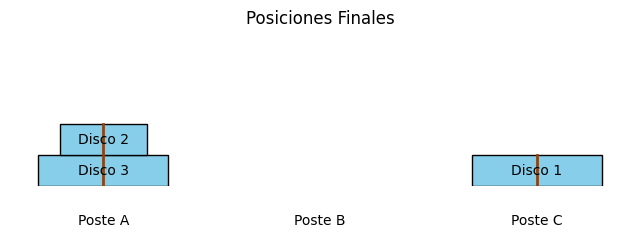

In [4]:
# Dibujar las posiciones finales (asegúrate de tener posiciones_finales actualizadas)
dibujar_torres(posiciones_finales, titulo = 'Posiciones Finales')

Note que en el ejemplo anterior se utilizaron dos funciones:

- `movimiento(posiciones_iniciales, movimiento)`: Esta función recibe dos argumentos: 
    (i) `posiciones_iniciales` que es un diccionario donde se especifica para cada poste, la lista de discos apilada en él. Cada lista de discos va desde el objeto que está en la base hasta el objeto que va en la cima.
    (ii) `movimiento` que es una tupla de tres elementos `(poste_inicial, poste_final, disco)`. Esta tupla específica que `disco` se va a remover del `poste_inicial` y en qué `poste_final` se va a ubicar.
- `dibujar_torres(posiciones, titulo)`: Esta función gráfica el estado del juego para unas `posiciones` dadas en el formato de tupla descrito anteriormente. Además se le puede poner un título al gráfico.

In [5]:
# Note que en caso de tratar de hacer un movimiento no permitido, la función arrojará un error y su debida explicación.
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

# En este caso no puedo remover el disco 2 del poste A porque no es el disco de la cima.
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 no está en la cima del poste A.

In [14]:
# Este otro error muestra que si tomamos el Disco 2, no lo podemos poner sobre el Disco 1
posiciones_iniciales = {'A': [3, 2], 'B': [], 'C': [1]} 
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 es más grande que el disco 1 que está en la cima del poste C.

Habiendo entendido este problema y las funciones que tiene para resolverlo, resuelva los siguientes dos puntos:

### 1.1. Caso base.
Suponga que $N = 3$. 

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/tower-of-hanoi.png">
</center>

Cree una secuencia de tuplas que digan la secuencia de movimientos que llevan la Torre del poste A al C cumpliendo con todas las reglas del enunciado.

Las tuplas deben seguir el siguiente formato `(poste inicial, poste final, disco)`. Por ejemplo, llevar el disco 1 del poste A al C (tal como se muestra en la figura de arriba) sería `("A", "C", 1)`.

La siguiente función recibirá una lista de movimientos (tuplas) y ejecutará los movimientos. Esta lanzará un mensaje en caso de hacer algún movimiento no permitido.

La respuesta esperada debe ser algo del siguiente estilo:

```python
respuesta = [("A", "C", 1), ("A", "B", 2), ...]
```

In [6]:
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

In [12]:
respuesta = [('A', 'C', 1),
             ('A', 'B', 2),
             ('C', 'B', 1),
             ('A', 'C', 3),
             ('B', 'A', 1),
             ('B', 'C', 2),
             ('A', 'C', 1)]

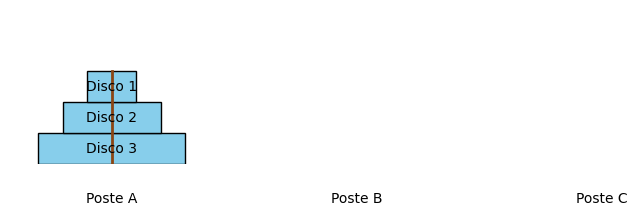

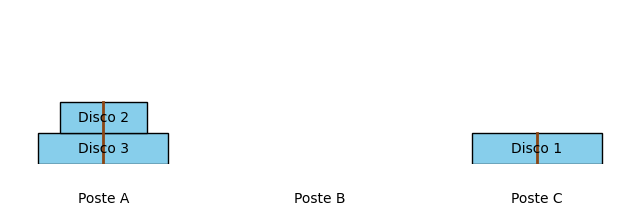

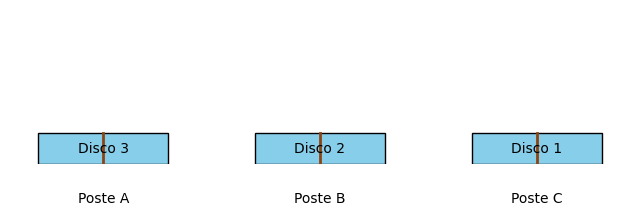

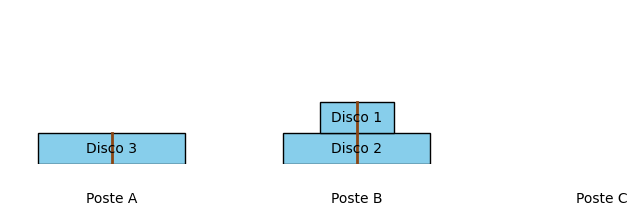

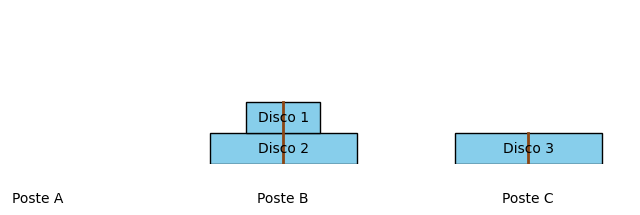

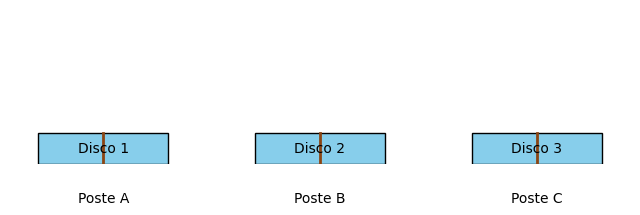

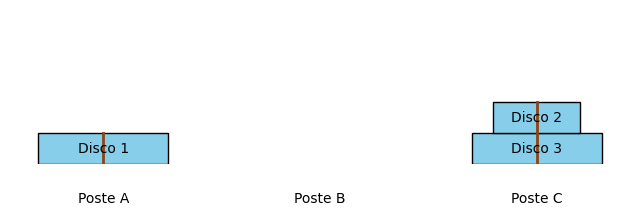

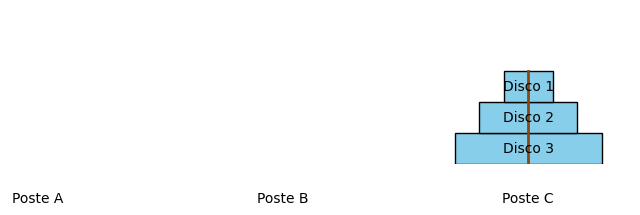

In [13]:
posiciones = posiciones_iniciales
for m in respuesta:
    dibujar_torres(posiciones, titulo = None)
    posiciones = movimiento(posiciones_iniciales = posiciones, movimiento = m)
dibujar_torres(posiciones, titulo = None)

### 1.2. Caso base con función.
Cree una función que le ayude a encontrar la lista de movimientos para solucionar el problema con la menor cantidad de movimientos posible. Esta función debe servir para generalizar la solución para cualquier $N$ entero positivo. 

> Hint: Se recomienda usar recursividad

In [7]:
# Usando recursión
def TorreDeHanoi(N, poste_inicial, poste_final, poste_auxiliar):
    movimientos = []
    if N == 0:
        return movimientos
    # Llamada recursiva para mover N-1 discos al poste auxiliar
    movimientos += TorreDeHanoi(N - 1, poste_inicial, poste_auxiliar, poste_final)
    # Mover el N-ésimo disco al poste final
    movimientos.append((poste_inicial, poste_final, N))
    # Llamada recursiva para mover los N-1 discos al poste final
    movimientos += TorreDeHanoi(N - 1, poste_auxiliar, poste_final, poste_inicial)
    return movimientos

respuesta = TorreDeHanoi(N = 3, poste_inicial = 'A', poste_final = 'C', poste_auxiliar = 'B')
respuesta

[('A', 'C', 1),
 ('A', 'B', 2),
 ('C', 'B', 1),
 ('A', 'C', 3),
 ('B', 'A', 1),
 ('B', 'C', 2),
 ('A', 'C', 1)]

c:\Users\Lucas\OneDrive - Universidad de los Andes\Complementarias\Proyectos de analítica en Python\Intro_Python\Introducción al Análisis de Datos en Python\Modulo 2. Pandas\Taller 2\utils.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (8, altura))


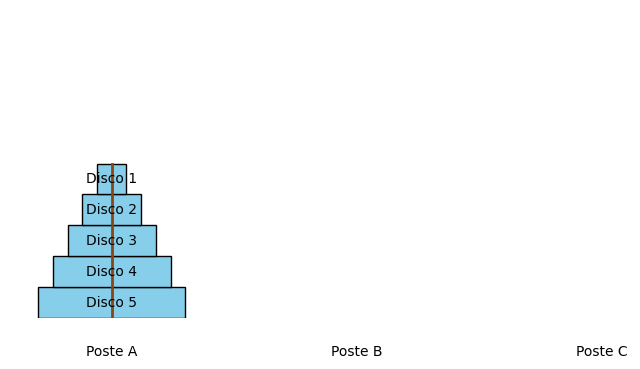

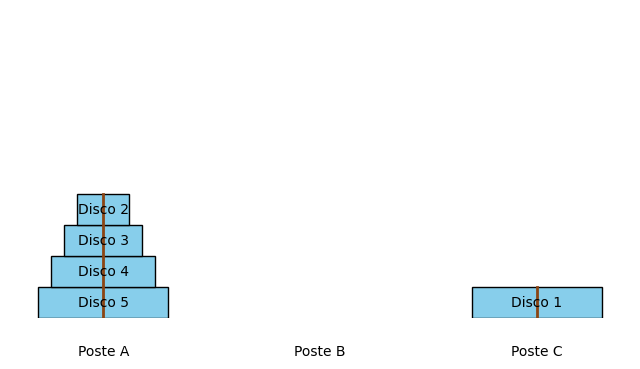

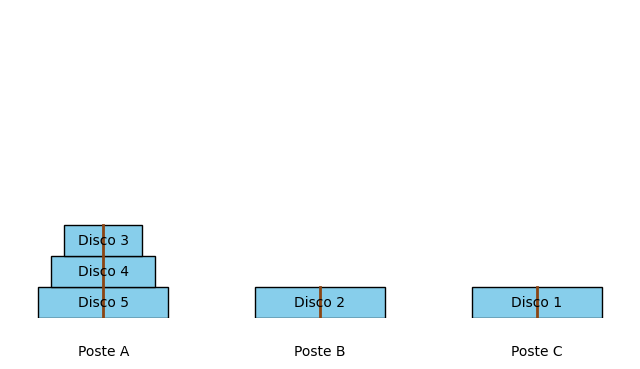

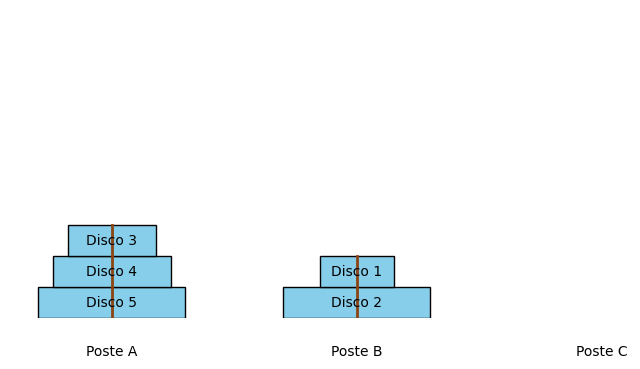

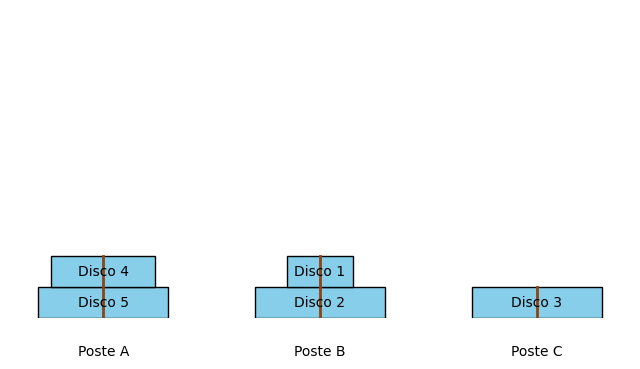

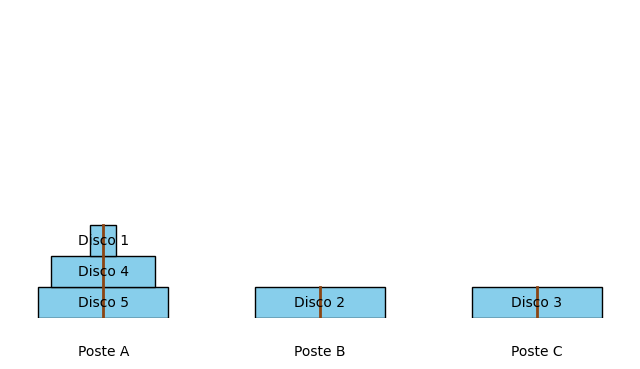

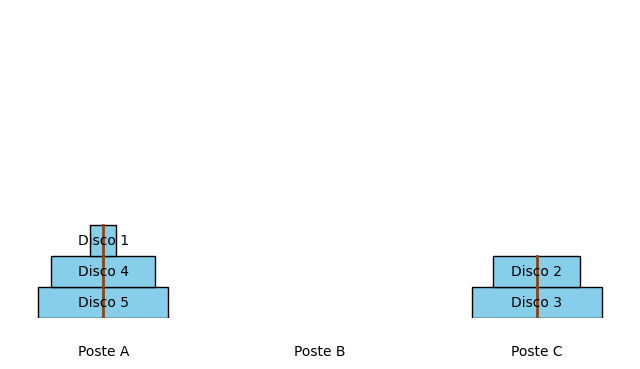

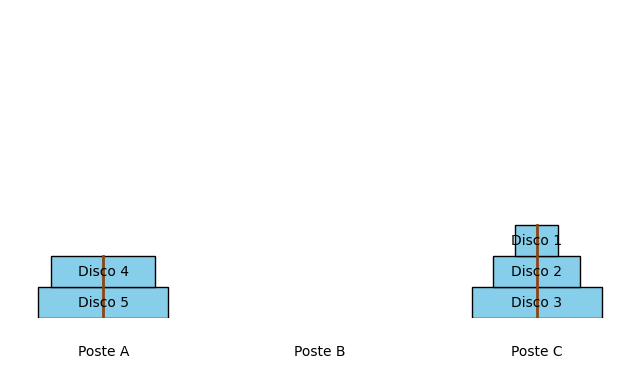

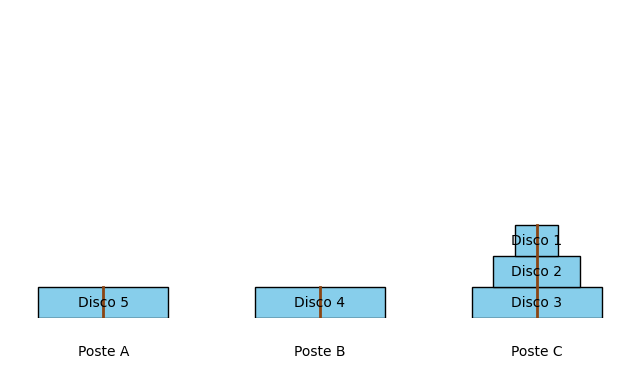

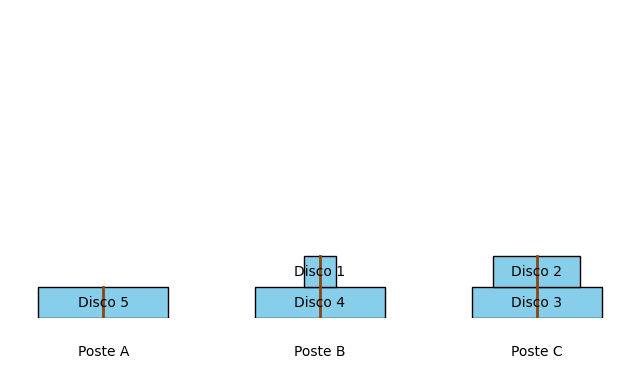

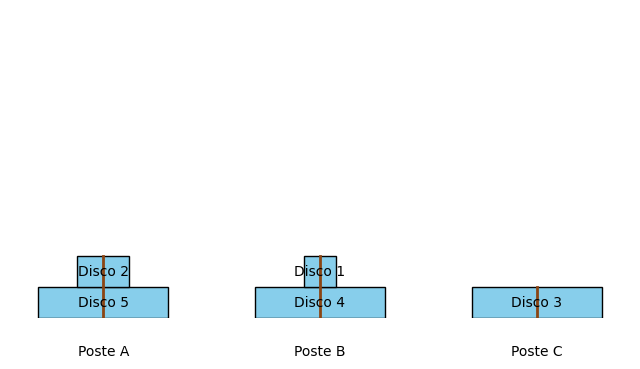

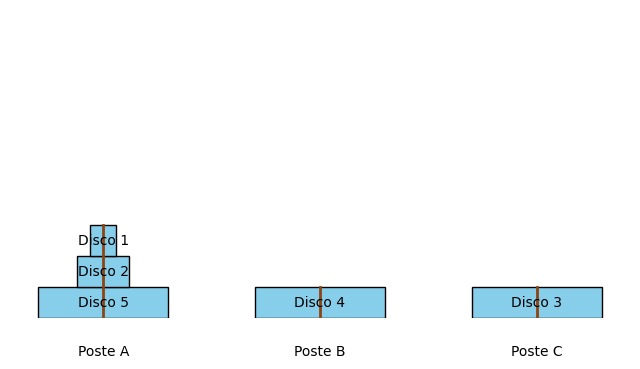

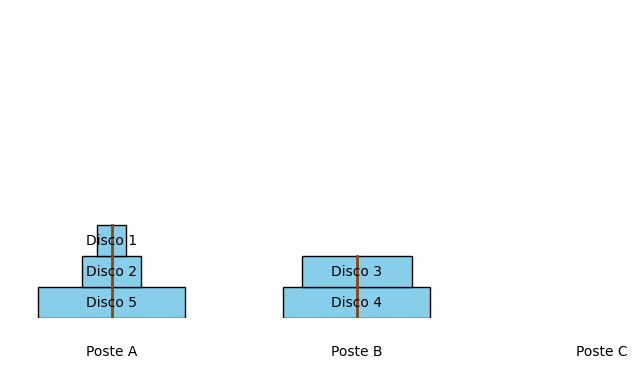

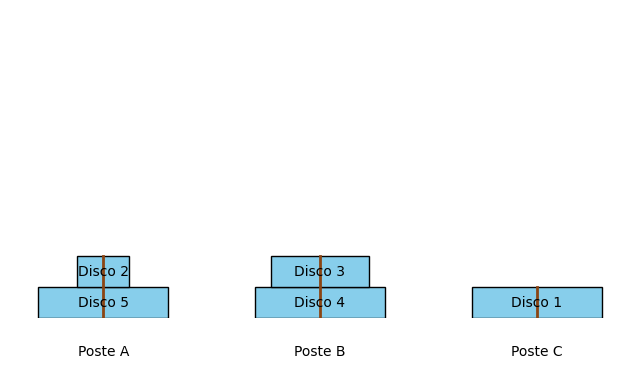

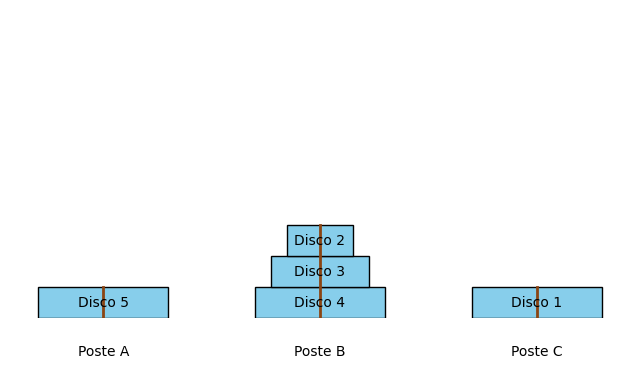

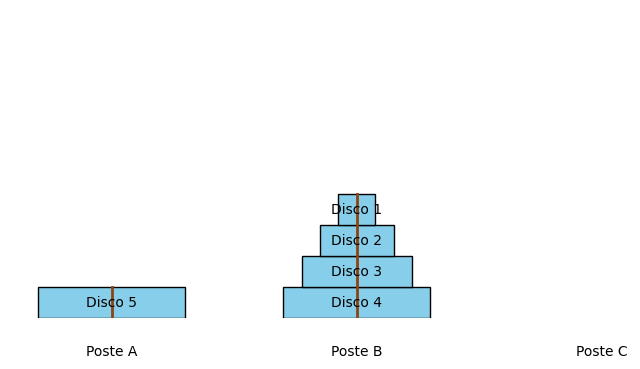

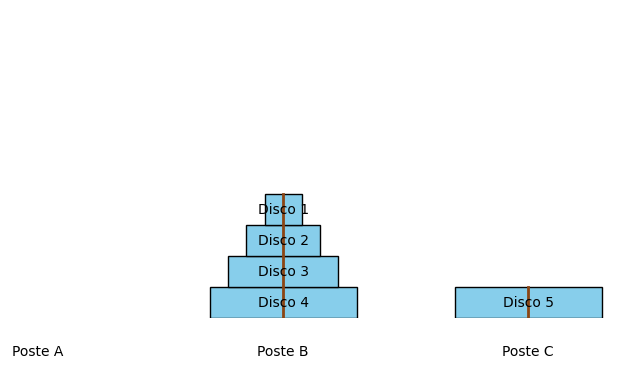

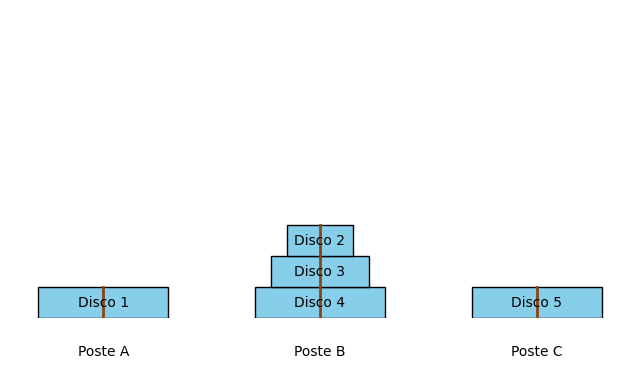

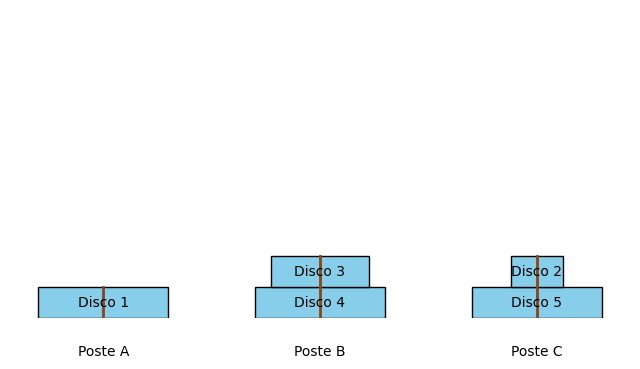

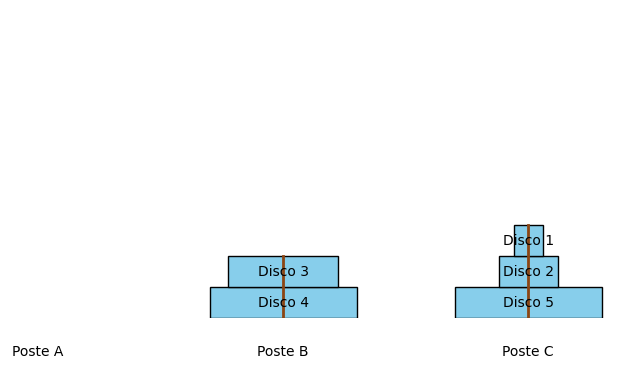

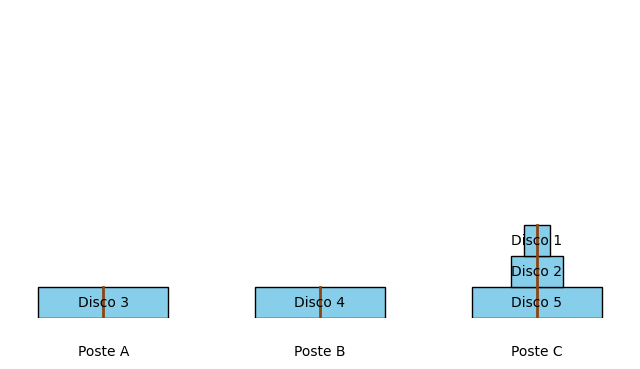

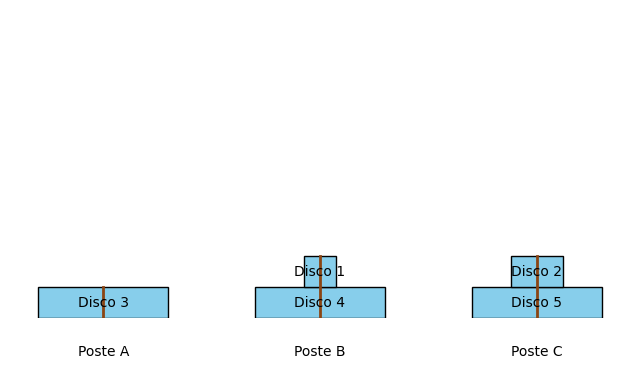

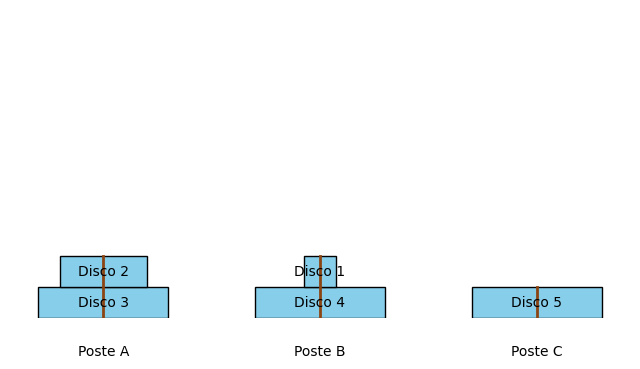

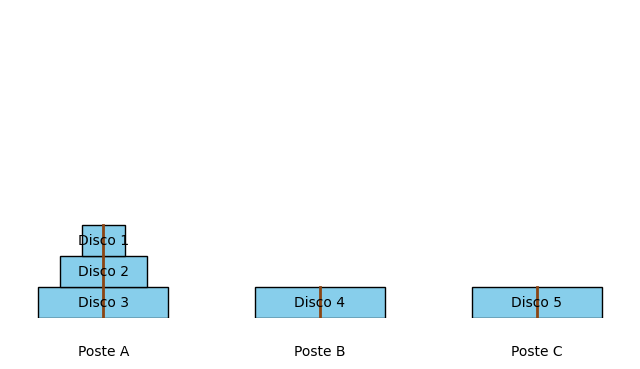

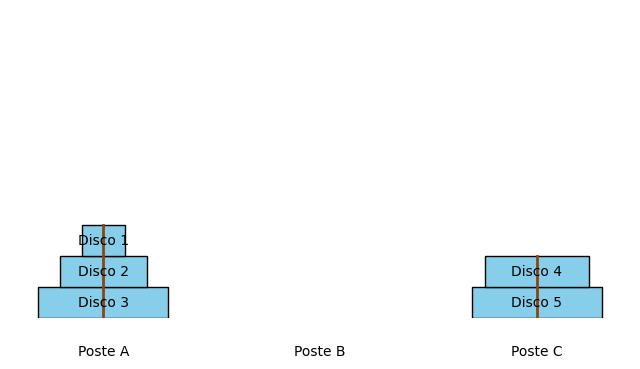

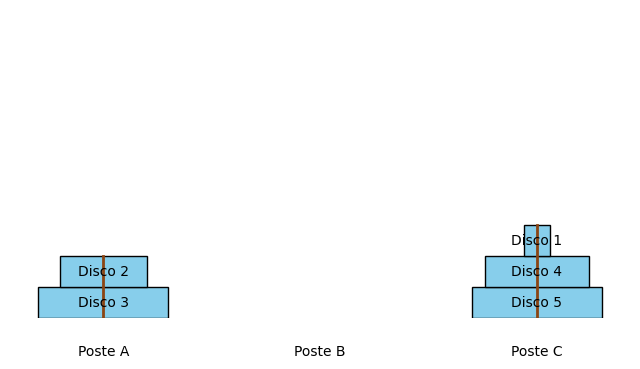

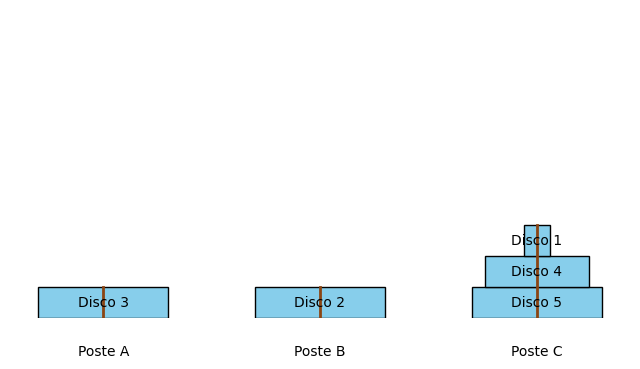

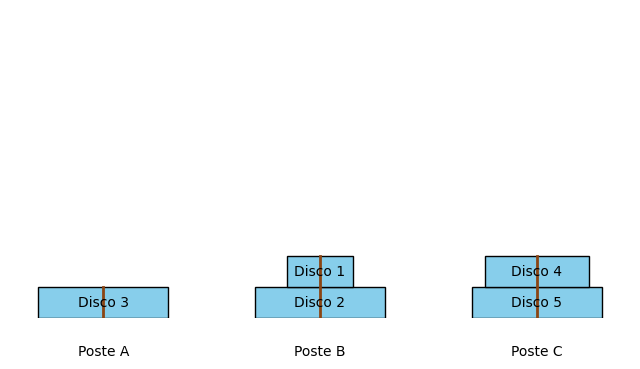

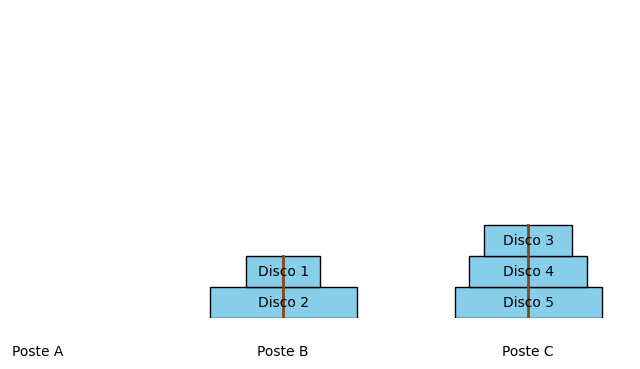

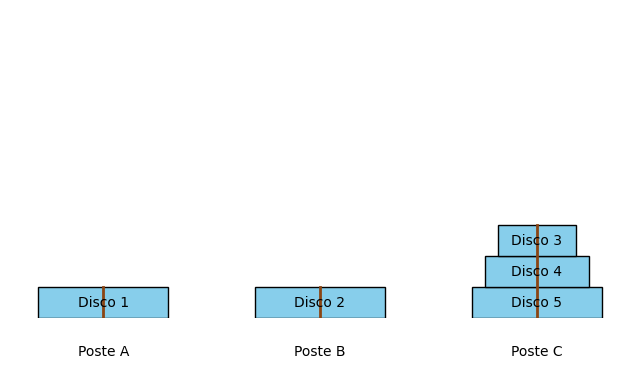

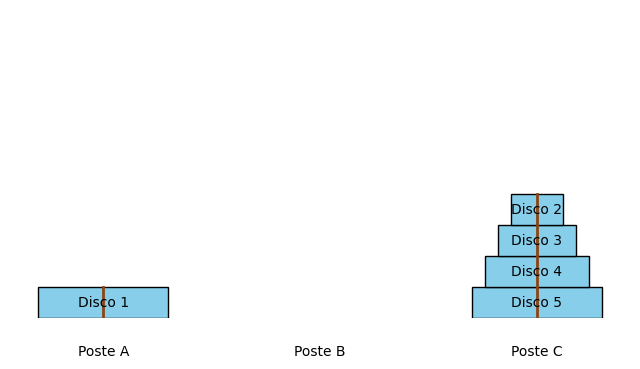

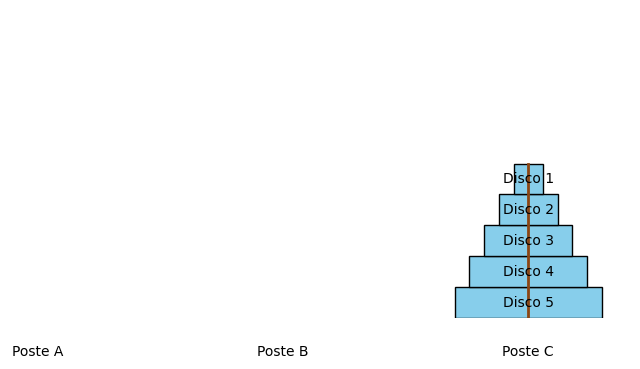

In [15]:
# import sys
# Aumentar el límite de recursión a necesidad
# sys.setrecursionlimit(1000)

N = 5

posiciones = {
    "A": list(range(N, 0, -1)),
    "B": [],
    "C": []
}

respuesta = TorreDeHanoi(N = N, poste_inicial = 'A', poste_final = 'C', poste_auxiliar = 'B')

for m in respuesta:
    dibujar_torres(posiciones, titulo = None)
    posiciones = movimiento(posiciones_iniciales = posiciones, movimiento = m)
dibujar_torres(posiciones, titulo = None)

## Punto 2. Pandas

En este punto va a explorar diferentes bases de datos con Pandas.

1. Importe el archivo `player_data.csv` y visualice las primeras 5 filas.

In [16]:
import pandas as pd

player_data = pd.read_csv("./Datos/player_data.csv", sep = ";")
player_data.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

2. Calcule el número de jugadores con una altura (`height`) entre 180 y 190 inclusivos.

In [17]:
player_data["height"].between(180, 190, "both").sum()

5925

3. Calcule el número de jugadores que nacieron en el año 1980.

In [18]:
player_data["birthday"] = pd.to_datetime(player_data["birthday"])
(player_data["birthday"].dt.year == 1980).sum()

434

4. Muestra el top 10 de los jugadores con mayor peso (`weight`) en orden descendente. En caso de que tenga más de un jugador con el mismo peso, ordenelos en orden alfabético por el nombre.

In [19]:
player_data.sort_values(by = ["weight", "player_name"], ascending = [False, True]).head(10)

id  player_api_id        player_name  player_fifa_api_id   birthday  \
5901    5908         148325   Kristof van Hout              185306 1987-02-09   
10297  10313          27313          Tim Wiese               53012 1981-12-17   
4879    4884           5044   Jeroen Verhoeven              137692 1980-04-30   
4408    4412          27267     Ishmael Miller              169725 1987-03-05   
1595    1598         101584             Cassio              167958 1987-06-06   
1819    1822          19020  Christopher Samba               46590 1984-03-28   
5969    5976         210822    Lars Unnerstall              199833 1990-07-20   
6762    6772          30669   Marcus Hahnemann               53785 1972-06-15   
44        45          40005     Abdoulaye Faye              100329 1978-02-26   
3026    3030          33060     Enoch Showunmi              157589 1982-04-21   

       height  weight  
5901   208.28     243  
10297  193.04     243  
4879   198.12     227  
4408   193.04     225  
1595   195.58     220  
1819   193.04     220  
5969   198.12     220  
6762   190.50     220  
44     187.96     218  
3026   195.58     218

5. Cree una lista de `tuplas` que contenga el número de jugadores que nacen cada año desde el año 1980 hasta 1990.

La estructura debe verse de la siguiente forma 
```python
[(1980, 123), (1981, 140) ..., (1990, 83)]
```

En este ejemplo con números inventados significaría que hay 123 jugadores nacidos en 1980, 140 en 1981, etc.

In [20]:
conteo = player_data.loc[player_data["birthday"].dt.year.between(1980, 1990), "birthday"].dt.year.value_counts()
conteo = conteo.sort_index()

list(zip(conteo.index, conteo.values))

[(1980, 434),
 (1981, 475),
 (1982, 487),
 (1983, 541),
 (1984, 607),
 (1985, 593),
 (1986, 710),
 (1987, 722),
 (1988, 802),
 (1989, 723),
 (1990, 696)]

6. Calcula la media y la desviación estándar del peso (`weight`) y la talla (`height`) de los jugadores llamados Adriano.

In [21]:
import numpy as np

# Extraemos la columna nombres
nombres = player_data["player_name"].str.split(" ", expand = True, n = 1).rename(columns = {0: "name", 1: "lastname"})
# Le agregamos una nueva columna al dataframe original
player_data = pd.concat([player_data, nombres], axis = 1)

# Filtra las filas donde el nombre es "Adriano" y selecciona las columnas 'height' y 'weight'
adriano_data = player_data.loc[player_data["name"] == "Adriano", ["height", "weight"]]

# Calcula la media y desviación estándar para las columnas filtradas
adriano_data.agg(["mean", "std"]).rename(index={"mean": "Media", "std": "Desviación Estándar"})

height      weight
Media                182.118000  173.400000
Desviación Estándar    5.361479   11.606512

7. ¿Cuántos jugadores nacieron en cada día de la semana? No se le olvide poner el nombre del día. ¿Cuál es el día con menos nacimientos?

In [22]:
dia_nacimiento = player_data["birthday"].dt.day_of_week.value_counts().reset_index(name = "n")
dia_nacimiento = dia_nacimiento.sort_values("birthday").rename(columns = {"birthday": "Día de Nacimiento"})

# Mapeamos los números a los nombres de los días de la semana
days = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Dómingo'}
dia_nacimiento['Día de Nacimiento'] = dia_nacimiento['Día de Nacimiento'].map(days)
dia_nacimiento

# El día con menos nacimientos es el domingo

Día de Nacimiento     n
3             Lunes  1643
1            Martes  1652
4         Miércoles  1607
2            Jueves  1648
0           Viernes  1685
5            Sábado  1463
6           Dómingo  1362

8. Importe la base `league_data.csv` `match_data.csv` y utilícelas para encontrar la liga que jugó más partidos.

In [23]:
league_data = pd.read_csv("./Datos/league_data.csv", sep = ";")
league_data.head()

id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A

In [24]:
match_data = pd.read_csv("./Datos/match_data.csv", sep = ";")
match_data.head()

id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  
1  3.80  2.00  3.25  3.25  1.85  3.25  3.75  1.91  3.25  3.60  
2  2.50  2.35  3.25  2.65  2.50  3.20  2.50  2.30  3.20  2.75  
3  7.50  1.45  3.75  6.50  1.50  3.75  5.50  1.44  3.75  6.50  
4  1.73  4.50  3.40  1.65  4.50  3.50  1.65  4.75  3.30  1.67  

[5 rows x 115 columns]

In [25]:
match_data2 = match_data.merge(league_data, how = "left", left_on = ["league_id", "country_id"], right_on = ["id", "country_id"])

In [26]:
match_data2.groupby("name")["match_api_id"].size().reset_index(name = "n") \
    .sort_values(by = ["n", "name"], ascending = [False, True])

name     n
1     England Premier League  3040
2             France Ligue 1  3040
9            Spain LIGA BBVA  3040
4              Italy Serie A  3017
3      Germany 1. Bundesliga  2448
5     Netherlands Eredivisie  2448
7   Portugal Liga ZON Sagres  2052
6         Poland Ekstraklasa  1920
8    Scotland Premier League  1824
0     Belgium Jupiler League  1728
10  Switzerland Super League  1422

9. Encuentre el jugador que más partidos ha jugado para los datos que tenemos

> Hint: Busque las columnas que tengan los `ids` de los jugadores que estuvieron en el partido. En caso de que esta columna tenga muchos NAs, ignore esas celdas y trabaje con el restante.

In [27]:
# Note que hay unas columnas que dicen "player". Las vamos a usar para saber quiénes jugaron 
[i for i in match_data.columns]

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [28]:
columnas_player = match_data2.columns[match_data2.columns.str.contains("player")]
columnas_player

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
       'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 

Hay 3 tipos de variables:
- home_player_X1-X11 y away_player_X1-X11
- home_player_Y1-Y11 y away_player_Y1-Y11
- home_player_1-11 y away_player_1-11

Juntemos esas columnas en un vector y contemos las coincidencias para tratar de identificar un patron.

In [29]:
# Note que solo se tienen 10 entradas, por ende esta primera agrupación no puede ser los IDs de los jugadores
grupo1 = match_data2.columns[match_data2.columns.str.contains("player_X")]
jugadores_grupo1 = match_data2[grupo1].values.flatten()
valores_unicos1, recuentos1 = np.unique(jugadores_grupo1, return_counts=True)
pd.DataFrame({'Jugador': valores_unicos1, 'Recuento': recuentos1})

Jugador  Recuento
0       0.0        22
1       1.0     52702
2       2.0     63053
3       3.0     41353
4       4.0     99031
5       5.0     67887
6       6.0     98360
7       7.0     41209
8       8.0     63209
9       9.0      4421
10      NaN     40291

In [30]:
# Note que solo se tienen 10 entradas, por ende esta primera agrupación no puede ser los IDs de los jugadores
grupo2 = match_data2.columns[match_data2.columns.str.contains("player_Y")]
jugadores_grupo2 = match_data2[grupo2].values.flatten()
valores_unicos2, recuentos2 = np.unique(jugadores_grupo2, return_counts=True)
pd.DataFrame({'Jugador': valores_unicos2, 'Recuento': recuentos2})

Jugador  Recuento
0       0.0        22
1       1.0     48293
2       3.0    190866
3       5.0      5994
4       6.0     31456
5       7.0    116752
6       8.0     46420
7       9.0      5537
8      10.0     62970
9      11.0     22937
10      NaN     40291

In [31]:
# Note que solo se tienen 10 entradas, por ende esta primera agrupación no puede ser los IDs de los jugadores
grupo3 = match_data2.columns[match_data2.columns.str.contains("player_[0-9]")]
jugadores_grupo3 = match_data2[grupo3].values.flatten()
valores_unicos3, recuentos3 = np.unique(jugadores_grupo3, return_counts=True)
pd.DataFrame({'Jugador': valores_unicos3, 'Recuento': recuentos3}).sort_values("Recuento", ascending = False).head(5)

Jugador  Recuento
11060      NaN     29257
2089   31293.0       300
4029   41097.0       294
4334   42422.0       286
2482   33764.0       286

In [32]:
# El jugador Steve Mandanda es el jugador que más partidos jugó!
player_data.loc[player_data["player_api_id"] == 31293, :]

id  player_api_id     player_name  player_fifa_api_id   birthday  \
9993  10009          31293  Steve Mandanda              163705 1985-03-28   

      height  weight   name  lastname  
9993  185.42     181  Steve  Mandanda

10. Importe `player_attributes.csv` y calcule la correlación entre los atributos de los jugadores utilizando el método [dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) de pandas. Encuentre las 5 correlaciones más altas y las 5 más bajas.

Recuerde tener en cuenta solo variables relevantes para este análisis, i.e. numéricas y continuas.

In [33]:
player_attributes = pd.read_csv("./Datos/player_attributes.csv", sep = ";")

In [34]:
columnas_no_deseadas = ['id', 'player_fifa_api_id', 'player_api_id', 'date',"preferred_foot", 
                        "attacking_work_rate", "defensive_work_rate"]
correlaciones = player_attributes.drop(columns = columnas_no_deseadas).corr()

In [35]:
# Como la matriz de correlación es simétrica. Vamos a reemplazar la triangular superior con NAs para poder encontrar
# los valores más altos y más bajos de correlación

# Extraemos los indices de la triangular superior. Con k = 0vamos a decidir incluir la diagonal
indices_superiores = np.triu_indices(correlaciones.shape[0], k = 0)
# Reemplazamos con NAs
correlaciones.values[indices_superiores] = np.nan

In [36]:
# Vamos a hacer un melt para tener una estructura long y encontrar las 5 correlaciones más altas y las 5 más bajas 
correlaciones_long = correlaciones.reset_index().melt(id_vars = "index", var_name = "Variable 2", 
                                                      value_name = "Correlación")
correlaciones_long = correlaciones_long.rename(columns = {"index": "Variable 1"}).dropna().sort_values("Correlación")

In [37]:
# 5 Correlaciones más bajas
correlaciones_long.head(5)

Variable 1     Variable 2  Correlación
415       gk_diving   ball_control    -0.740928
419     gk_reflexes   ball_control    -0.737894
418  gk_positioning   ball_control    -0.734933
416     gk_handling   ball_control    -0.732483
205       gk_diving  short_passing    -0.693313

In [38]:
# 5 Correlaciones más altas
correlaciones_long.tail(5)

Variable 1       Variable 2  Correlación
973   standing_tackle          marking     0.950134
1009   sliding_tackle  standing_tackle     0.953104
1118   gk_positioning      gk_handling     0.966301
1119      gk_reflexes      gk_handling     0.966326
1189      gk_reflexes   gk_positioning     0.966711